In [1]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
DATA_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data')

import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
y_org, sr = librosa.load(os.path.join(DATA_PATH, '024 Adele - Someone Like You.wav'), sr=8000, duration=30)
y_rec, sr = librosa.load(os.path.join(DATA_PATH, 'someone_like_you_record.wav'), sr=8000)

In [3]:
def rmsd(x, y):
    return np.sqrt(np.sum((x - y)**2) / x.size)


def viz_spectrums(y_org, y_rec, sr):

    fft_org = np.fft.fft(y_org)
    fft_rec = np.fft.fft(y_rec)
    N = fft_org.size

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(list(map(lambda x: x * sr / N, range(N // 2 + 1))), np.abs(fft_org[:N // 2 + 1]), label='Clean sound')
    ax.plot(list(map(lambda x: x * sr / N, range(N // 2 + 1))), np.abs(fft_rec[:N // 2 + 1]), label='Record sound')
    plt.legend()
    plt.show()

    print(f'RMSD: {rmsd(np.abs(fft_org[:N//2+1]), np.abs(fft_rec[:N//2+1]))}')

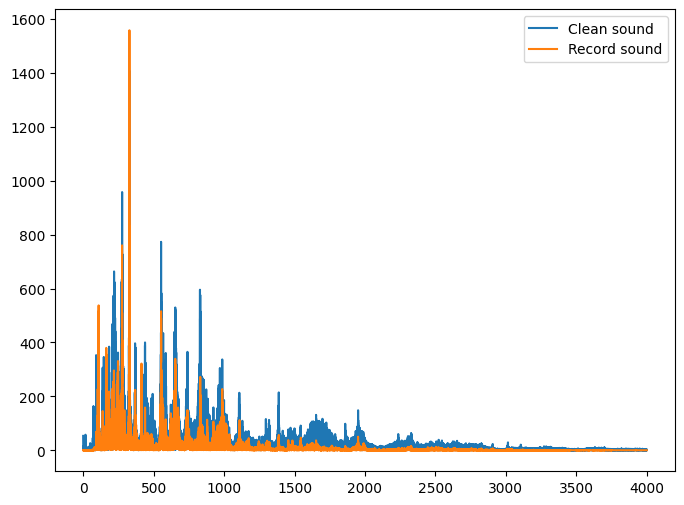

RMSD: 33.413598269465716


In [4]:
viz_spectrums(y_org, y_rec, sr)

In [5]:
from audiomentations import HighPassFilter, LowPassFilter

low_filt = LowPassFilter(p=1, min_cutoff_freq=500, max_cutoff_freq=4000, min_rolloff=6, max_rolloff=6)
y_low = low_filt(y_org, sr)

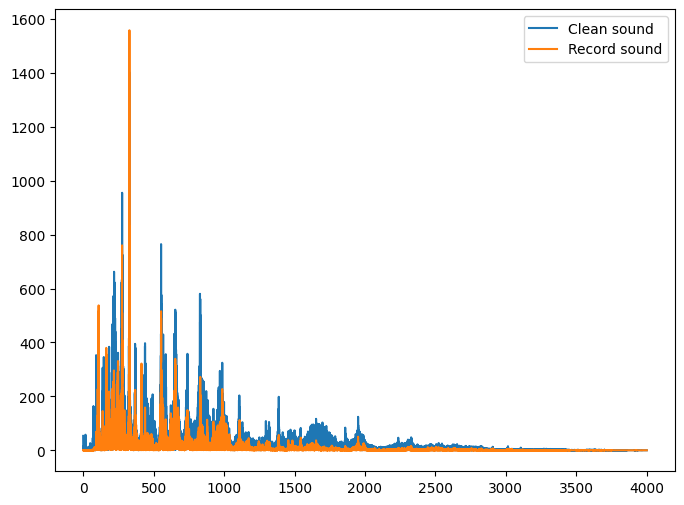

RMSD: 32.25689856837379


In [6]:
viz_spectrums(y_low, y_rec, sr)

In [7]:
import librosa.display

In [8]:
def viz_spectrograms(y_org, y_rec, sr):
    fig, ax = plt.subplots(figsize=(14, 6), ncols=2)

    S1 = librosa.feature.melspectrogram(y=y_org, sr=sr, n_fft=1024, hop_length=512, n_mels=128)
    img_org = librosa.display.specshow(
        data=librosa.amplitude_to_db(np.abs(S1), ref=np.max),
        sr=sr,
        n_fft=1024,
        hop_length=512,
        x_axis='time',
        y_axis='mel',
        ax=ax[0]
    )
    ax[0].set_title("Original")

    S2 = librosa.feature.melspectrogram(y=y_rec, sr=sr, n_fft=1024, hop_length=512, n_mels=128)
    img_rec = librosa.display.specshow(
        data=librosa.amplitude_to_db(np.abs(S2), ref=np.max),
        sr=sr,
        n_fft=1024,
        hop_length=512,
        x_axis='time',
        y_axis='mel',
        ax=ax[1]
    )
    ax[1].set_title("Recorded")

    fig.colorbar(img_org, ax=ax[0], format="%+2.f dB")
    fig.colorbar(img_rec, ax=ax[1], format="%+2.f dB")

    plt.show()

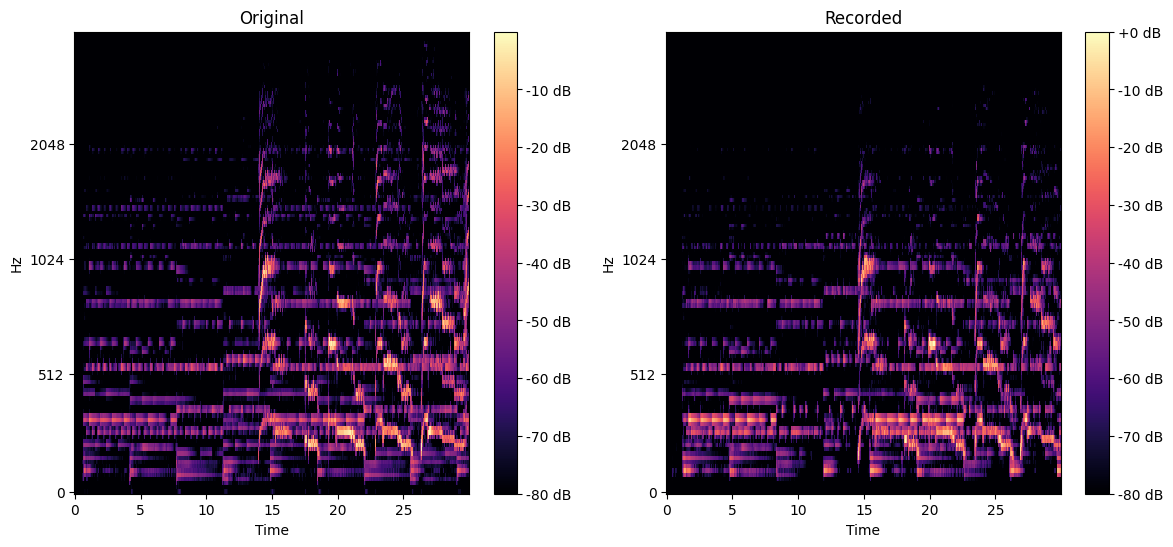

In [9]:
viz_spectrograms(y_org, y_rec, sr)

In [10]:
y_org, sr = librosa.load(os.path.join(DATA_PATH, '055-Coldplay-Viva La Vida.wav'), sr=8000, duration=30)
y_rec, sr = librosa.load(os.path.join(DATA_PATH, 'recordings/high_t.wav'), sr=8000, duration=30)

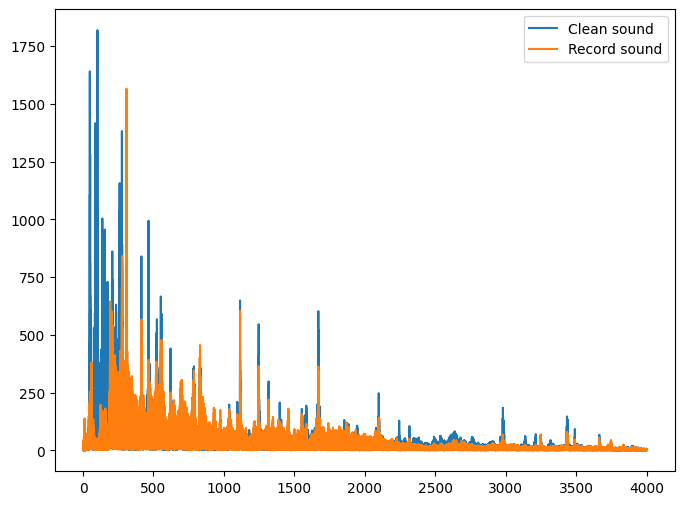

RMSD: 55.25267661072535


In [11]:
viz_spectrums(y_org, y_rec, sr)

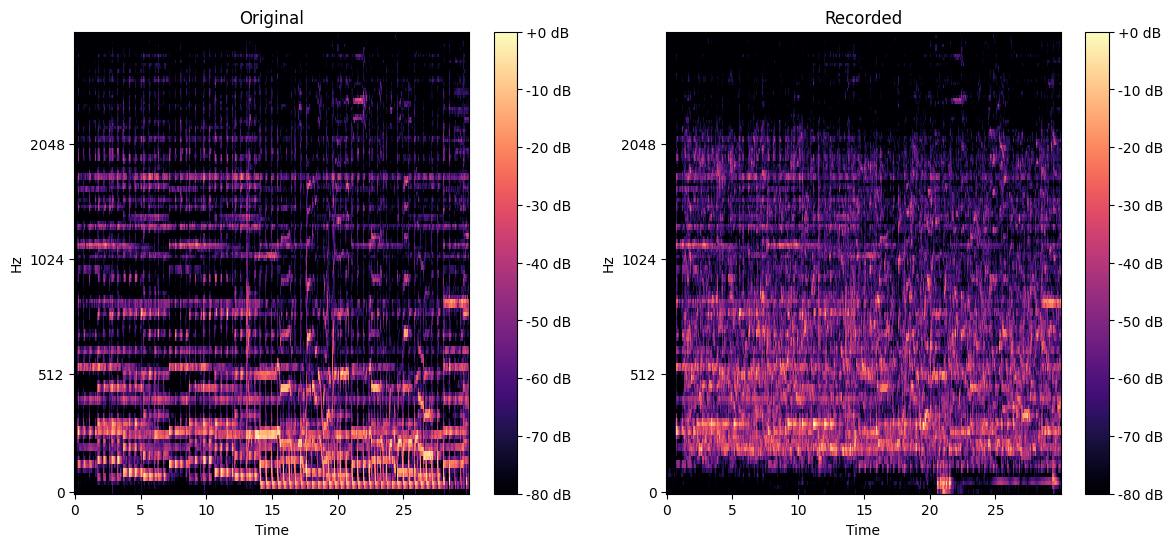

In [12]:
viz_spectrograms(y_org, y_rec, sr)

In [13]:
from audiomentations import Compose, LowPassFilter, HighPassFilter

In [14]:
comp = Compose([LowPassFilter(p=1, min_cutoff_freq=500, max_cutoff_freq=4000, min_rolloff=6, max_rolloff=6), HighPassFilter(p=1)])

In [15]:
y_tr = comp(y_org, sample_rate=sr)

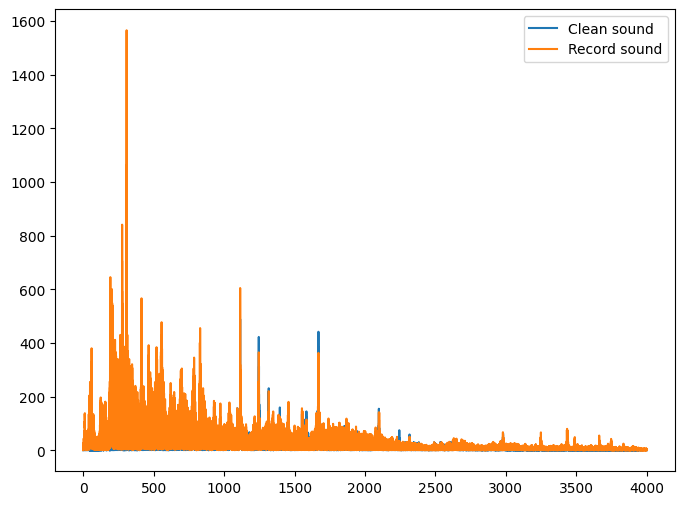

RMSD: 46.56766120169828


In [16]:
viz_spectrums(y_tr, y_rec, sr)

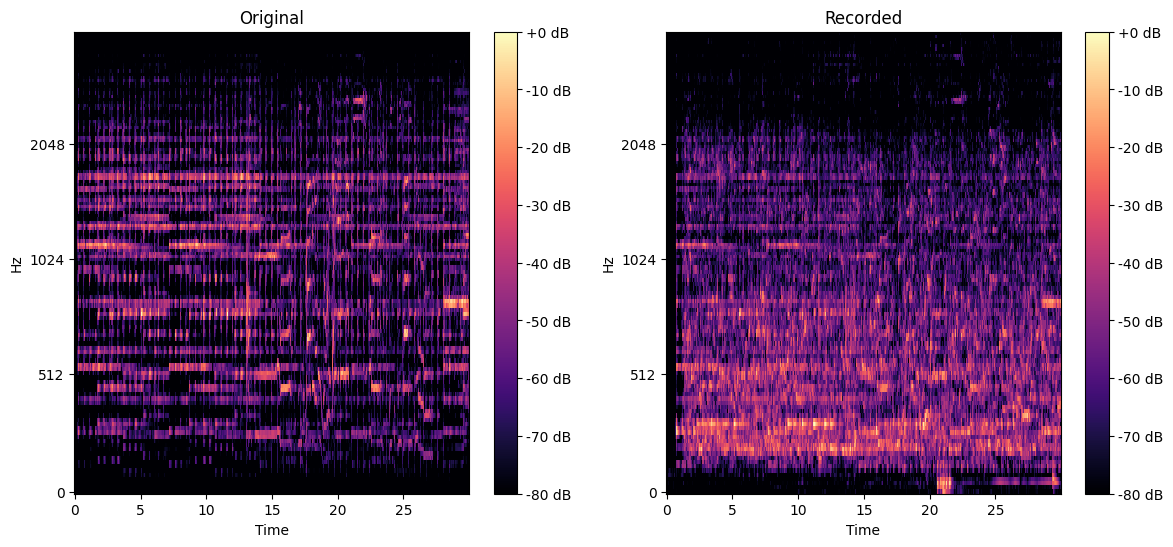

In [17]:
viz_spectrograms(y_tr, y_rec, sr)